Per seguire gli sviluppi di questo notebook ti devi assicurare di avere installato:
numpy,
matplotlib,
scipy,
e naturalmente
**seaborn**

Importiamo i pacchetti. Per convenzione gli addetti ai lavori hanno l'abitudine di chiamare seaborn **sns**:

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
import seaborn as sns

Cominciamo a trattare con le **distribuzioni univariate** ovvero di una singola variabile aleatoria.

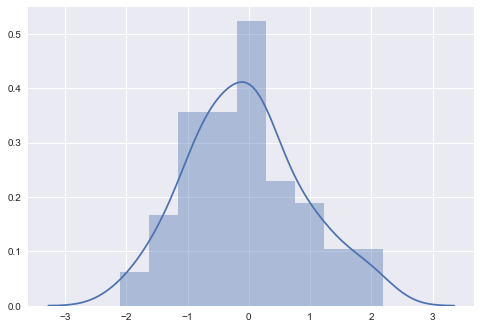

In [52]:
np.random.seed(sum(map(ord,"kde"))) #seme del generatore casuale numpy (senza seme i valori non saranno riproducibili!)
x100 = np.random.normal(size=100)      #chiamata del generatore casuale numpy per 100 elementi distribuiti normalmente
sns.distplot(x100)                     #metodo seaborn per generare un grafico di distribuzione ovvero un istogramma normalizzato
plt.show()                          #mostra il grafico seaborn attraverso la libreri matplotlib.pyplot

La curva continua che tende ad adattarsi alla forma della distribuzione discreta prende il nome di **KDE** ovvero **Kernel Distribution Estimation**. Proviamo ad ingrandire il campione statistico, ovvero ad aumentare il numero di valori della variabile casuale *x*: passiamo da size=100 a size=100000

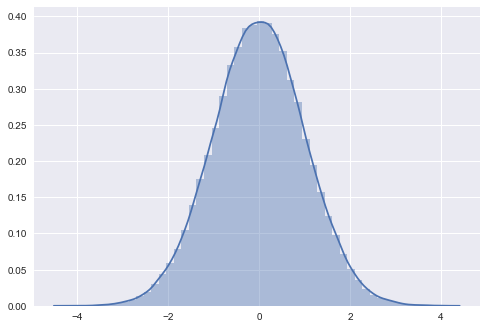

In [53]:
np.random.seed(sum(map(ord,"kde")))
x100000 = np.random.normal(size=100000)
sns.distplot(x100000)
plt.show()

Vediamo che la KDE tende alla PDF della distribuzione normale ovvero assume la tipica forma a campana della gaussiana.

Se vogliamo omettere la KDE basta passare a distplot l'argomento kde=False.

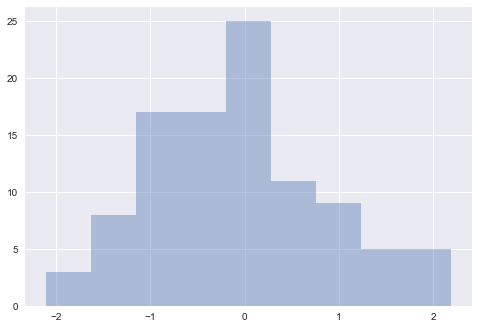

In [54]:
sns.distplot(x100,kde=False)
plt.show()

Si possono passare anche più di una distribuzione nello stesso grafico:

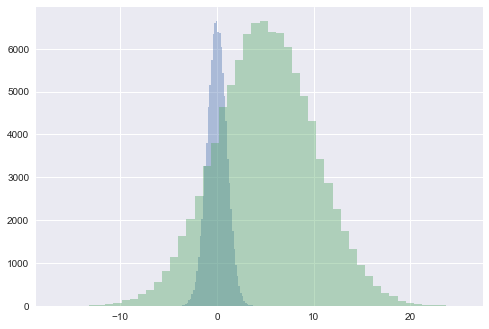

In [55]:
np.random.seed(sum(map(ord,"kde1")))
x100000 = np.random.normal(size=100000) #distribuzione normale di 100000 valori centrati su 5 con deviazione standard pari a 5
np.random.seed(sum(map(ord,"kde1")))
x100000_5 = 5 * np.random.normal(size=100000) + 5  #distribuzione normale di 100000 valori centrati su 5 con deviazione standard pari a 5
sns.distplot(x100000,kde=False)
sns.distplot(x100000_5,kde=False)
plt.show()

Se invece li vogliamo affiancare su due grafici differenti usiamo il metodo subplot di matplotlib.pyplot:

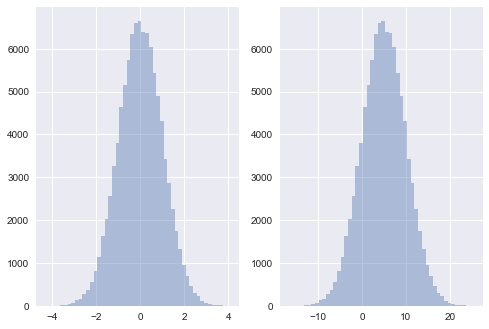

In [56]:
plt.subplot(1,2,1)
sns.distplot(x100000,kde=False)
plt.subplot(1,2,2)
sns.distplot(x100000_5,kde=False)
plt.show()

Se vogliamo usare la normalizzazione anche se kde=False, usiamo l'argomento norm_hist=True

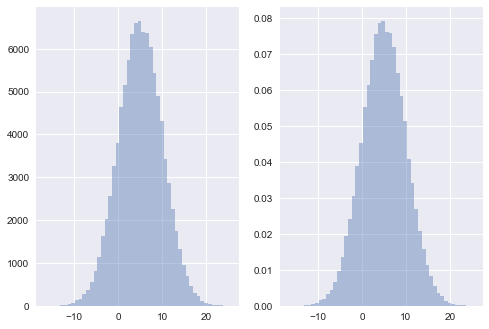

In [57]:
plt.subplot(1,2,1)
sns.distplot(x100000_5, kde=False)
plt.subplot(1,2,2)
sns.distplot(x100000_5, kde=False, norm_hist=True)
plt.show()

## pandas

Prima di continuare richiamiamo delle chicche molto importanti sui DataFrame di pandas.

Per prima cosa, con un po' di creatività creiamo un dataset, ovvero un oggetto di tipo DataFrame a partire da un paio di dizionari. Importiamo la libreria pandas:

In [58]:
import pandas as pd

Creiamo un dizionario le cui chiavi rappresentano gli attributi di un gatto e i valori associati sono delle osservazioni. In questo caso ho scelto un numero di 4 osservazioni:

In [59]:
gatti = {'Nome':['Fuffi','Gladio','Minciu','Findus'],
         'sesso':['femmina','maschio','femmina','maschio'],
         'Anni':[3,5,6,2],
         'pelo_lungo':[True,False,True,True],
         'empatia':[8,3,9,6]}

Vediamo qual è l'effetto che il metodo DataFrame ha su questo dizionario:

In [60]:
pd.DataFrame(gatti)

,Anni,Nome,empatia,pelo_lungo,sesso
0,3,Fuffi,8,True,femmina
1,5,Gladio,3,False,maschio
2,6,Minciu,9,True,femmina
3,2,Findus,6,True,maschio


Facciamo lo stesso con un dataset analogo di cani:

In [61]:
cani = {'Nome':['Bobbi','Scheggia','Fastidio','Reto'],
         'sesso':['maschio','maschio','maschio','maschio'],
         'Anni':[13,8,9,2],
         'pelo_lungo':[False,False,True,True],
         'empatia':[6,6,2,7]}

Questa volta invece di visualizzare i dataframe passiamoli a 2 oggetti per i cui identificatori ho scelto i nomi df_g e df_c, rispettivamente:

In [62]:
df_g = pd.DataFrame(gatti)
df_c = pd.DataFrame(cani)

Ora assumiamo di voler unire df_g e df_c in un unico dataframe. Anche se ti è forse venuto subito in mente di concatenarli guarda cosa accadrebbe usando **pd.concat**:

In [63]:
pd.concat([df_c,df_g])

,Anni,Nome,empatia,pelo_lungo,sesso
0,13,Bobbi,6,False,maschio
1,8,Scheggia,6,False,maschio
2,9,Fastidio,2,True,maschio
3,2,Reto,7,True,maschio
0,3,Fuffi,8,True,femmina
1,5,Gladio,3,False,maschio
2,6,Minciu,9,True,femmina
3,2,Findus,6,True,maschio


Il risultato sembra già soddisfacente ma l'indice del dataframe è pieno di duplicati. Per evitare questa evenienza è meglio usare il metodo **pd.merge** passando l'argomento **on** per specificare le colonne sulle quali intendiamo operare l'unione (ovvero nel nostro caso tutte!) e l'argomento **how** per richiedere l'unione **esterna**:

In [64]:
df_gc = pd.merge(df_g,df_c,on=['Nome','Anni','empatia','sesso','pelo_lungo'],how='outer')

In [65]:
df_gc

,Anni,Nome,empatia,pelo_lungo,sesso
0,3,Fuffi,8,True,femmina
1,5,Gladio,3,False,maschio
2,6,Minciu,9,True,femmina
3,2,Findus,6,True,maschio
4,13,Bobbi,6,False,maschio
5,8,Scheggia,6,False,maschio
6,9,Fastidio,2,True,maschio
7,2,Reto,7,True,maschio


così facendo abbiamo perso traccia della specie dell'animale. Possiamo creare delle nuove proprietà 'gatto' e 'cane' mediante:

In [66]:
df_gc['gatto'] = df_gc.Nome.isin(df_g.Nome)

In [67]:
df_gc['cane'] = df_gc.Nome.isin(df_c.Nome)

In [68]:
df_gc

,Anni,Nome,empatia,pelo_lungo,sesso,gatto,cane
0,3,Fuffi,8,True,femmina,True,False
1,5,Gladio,3,False,maschio,True,False
2,6,Minciu,9,True,femmina,True,False
3,2,Findus,6,True,maschio,True,False
4,13,Bobbi,6,False,maschio,False,True
5,8,Scheggia,6,False,maschio,False,True
6,9,Fastidio,2,True,maschio,False,True
7,2,Reto,7,True,maschio,False,True


In alternativa (qui lo faccio per esercizio e dopo anche per usare una funzionalità ulteriore di seaborn) possiamo creare una colonna 'specie' e indicare la stringa 'gatto' o 'cane':

In [69]:
df_gc['specie'] = np.where(df_gc.Nome.isin(df_g.Nome),'gatto','cane')

In [70]:
df_gc

,Anni,Nome,empatia,pelo_lungo,sesso,gatto,cane,specie
0,3,Fuffi,8,True,femmina,True,False,gatto
1,5,Gladio,3,False,maschio,True,False,gatto
2,6,Minciu,9,True,femmina,True,False,gatto
3,2,Findus,6,True,maschio,True,False,gatto
4,13,Bobbi,6,False,maschio,False,True,cane
5,8,Scheggia,6,False,maschio,False,True,cane
6,9,Fastidio,2,True,maschio,False,True,cane
7,2,Reto,7,True,maschio,False,True,cane


## Applicazione di seaborn

Vediamo come rappresentare l'istogramma dell'età degli animali.

Innanzitutto pandas ha dei metodi che sono stati sviluppati per richiamare automaticamente i metodi matplotlib. Una delle scelte che ci spetta è quella del numero di bins in cui i dati vengono conteggiati.  

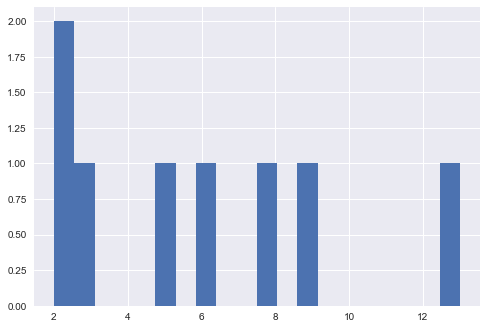

In [71]:
df_gc.Anni.hist(bins=20)
plt.show()

Passiamo invece a seaborn:

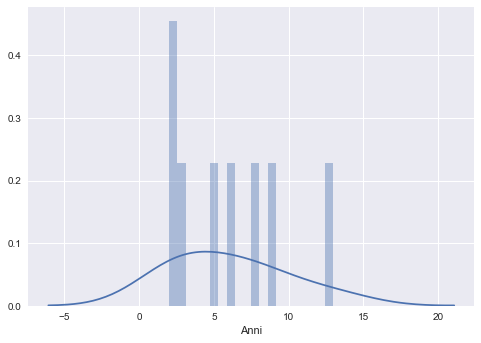

In [72]:
sns.distplot(df_gc.Anni,bins=20)
plt.show()

Vediamo quindi l'utilità del KDE automaticamente generato da seaborn. Naturalmente dal punto di vista statistico il campione analizzato non è assolutamente rilevante e questo resta solo un esempio. Quindi è meglio usare un'altra tipologia di rappresentazione visiva.

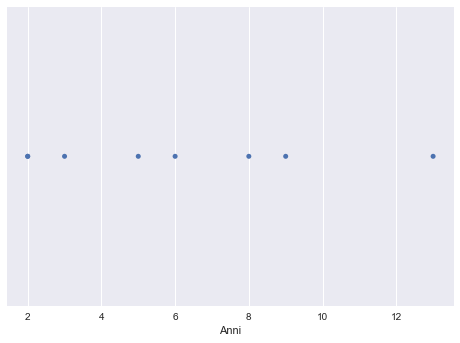

In [73]:
sns.stripplot(y='Anni',data=df_gc, orient='h')
plt.show()

Tuttavia ci sono due punti che si sovrappongono per animali di età pari a due anni.

## Il metodo cut di pandas e la discretizzazione categorica

Proviamo ad usare il metodo **cut**, definire i bins a mano e generare un oggetto di tipo categorical.

In [74]:
bins = [0,4,8,12,16]

In [75]:
categorie = pd.cut(df_gc.Anni.values,bins)

In [76]:
categorie

[(0, 4], (4, 8], (4, 8], (0, 4], (12, 16], (4, 8], (8, 12], (0, 4]]
Categories (4, object): [(0, 4] < (4, 8] < (8, 12] < (12, 16]]

L'oggetto che pandas restituisce può essere pensato come un array di stringhe che indicano il nome di ogni bin.
Fai attenzione alla notazione matematica che indica che gli intervalli escludono il valore inferiore e includono quello superiore (contrariamente a quanto accade nelle convenzioni di python).
Internamente contiene un array di etichette (**codes**) che indicano i nomi delle categorie (**categories**):

In [77]:
categorie.codes

array([0, 1, 1, 0, 3, 1, 2, 0], dtype=int8)

In [78]:
categorie.categories

Index(['(0, 4]', '(4, 8]', '(8, 12]', '(12, 16]'], dtype='object')

usiamo il metodo **describe()** per evidenziare la statistica:

In [79]:
categorie.describe()

,counts,freqs
categories,,
"(0, 4]",3,0.375
"(4, 8]",3,0.375
"(8, 12]",1,0.125
"(12, 16]",1,0.125


Meglio procedere ad una visualizzazione più intuitiva con dei nomi descrittivi per le nostre categorie:

In [80]:
nomi_categorie = ['cucciolo','giovane','adulto','anziano']
categorie = pd.cut(df_gc.Anni.values,bins,labels=nomi_categorie)
categorie.describe()

,counts,freqs
categories,,
cucciolo,3,0.375
giovane,3,0.375
adulto,1,0.125
anziano,1,0.125


In [81]:
np.random.randint(1,16,100)

array([10, 15,  2, 14, 14,  1,  2,  9,  6,  3, 13, 13, 12, 14,  1,  9,  2,
        8,  1,  5,  5, 10, 15, 10, 15, 15, 11, 13,  2, 10, 14,  1,  3, 12,
        5, 12,  2,  5, 12,  8,  3,  9, 15, 10, 11, 12,  6, 13, 13, 15,  6,
        5, 11,  4, 13,  1, 11, 14, 15,  3,  9, 10, 13, 12, 12,  8, 13,  9,
        7, 12,  7,  1, 15,  8, 10, 12, 10,  1, 14, 10,  2,  6, 15, 10,  9,
       15,  4, 15, 11,  9, 13, 11, 15, 10, 14,  3,  9,  7,  7, 13])

In [82]:
np.random.seed(sum(map(ord,"categorie_100")))
cento_equiprobabili = np.random.randint(1,16,100)
categorie_100 = pd.cut(cento_equiprobabili,bins, labels=nomi_categorie)
categorie_100.describe()

,counts,freqs
categories,,
cucciolo,29,0.29
giovane,20,0.20
adulto,28,0.28
anziano,23,0.23


In [83]:
np.random.seed(sum(map(ord,"categorie_n_100")))
cento_dist_norm = np.round(np.random.normal(10,5,100))
cento_dist_norm_nonzero = np.where(cento_dist_norm>0,cento_dist_norm,0)
categorie_100 = pd.cut(cento_dist_norm,bins, labels=nomi_categorie)
categorie_100.describe()

,counts,freqs
categories,,
cucciolo,15,0.15
giovane,27,0.27
adulto,37,0.37
anziano,17,0.17
NaN,4,0.04


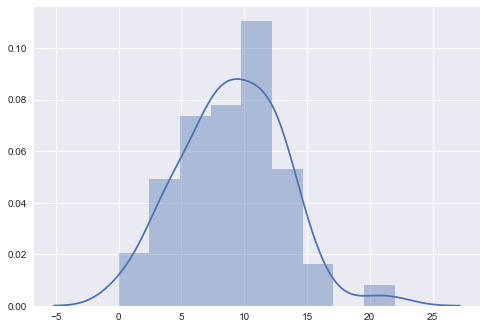

In [84]:
sns.distplot(cento_dist_norm_nonzero)
plt.show()

In [85]:
df_gc100 = pd.DataFrame(columns=['Nome','Anni','pelo_lungo','empatia','sesso','specie'])

In [86]:
np.random.seed(sum(map(ord,"specie_casuale")))
specie_casuale = np.random.choice(['gatto','cane'],100)

In [87]:
np.random.seed(sum(map(ord,"pelo_lungo")))
pelo_lungo_casuale = np.random.choice([True,False],100)

In [88]:
np.random.seed(sum(map(ord,"sesso")))
sesso_casuale = np.random.choice(['maschio','femmina'],100)

In [89]:
np.random.seed(sum(map(ord,"empatia")))
empatia_casuale = np.random.choice([0,1,2,3,4,5,6,7,8,9,10],100)

In [90]:
df_gc100.specie = specie_casuale
df_gc100.pelo_lungo = pelo_lungo_casuale
df_gc100.sesso = sesso_casuale
df_gc100.empatia = empatia_casuale

In [91]:
df_gc100.Anni = cento_dist_norm_nonzero

In [92]:
df_gc100['fase_di_vita'] = categorie_100.get_values()

In [93]:
df_gc100.head()

,Nome,Anni,pelo_lungo,empatia,sesso,specie,fase_di_vita
0,NaN,2.0,True,9,maschio,gatto,cucciolo
1,NaN,10.0,False,4,maschio,cane,adulto
2,NaN,4.0,False,7,maschio,cane,cucciolo
3,NaN,14.0,True,3,femmina,cane,anziano
4,NaN,6.0,False,0,femmina,cane,giovane


In [94]:
df_gc100.describe()

,Anni,empatia
count,100.000000,100.000000
mean,9.050000,5.630000
std,4.083411,2.935863
min,0.000000,0.000000
25%,6.000000,3.000000
50%,9.000000,6.000000
75%,12.000000,8.000000
max,22.000000,10.000000


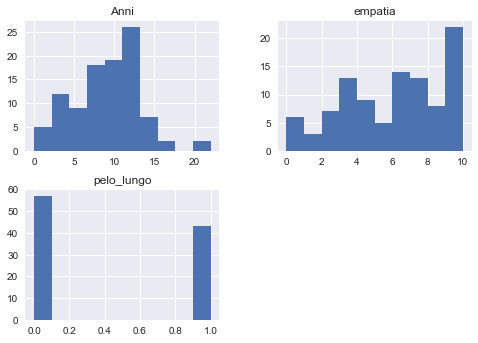

In [95]:
df_gc100.hist()
plt.show()

A questo punto usiamo la funzione stripplot su questo dataframe:

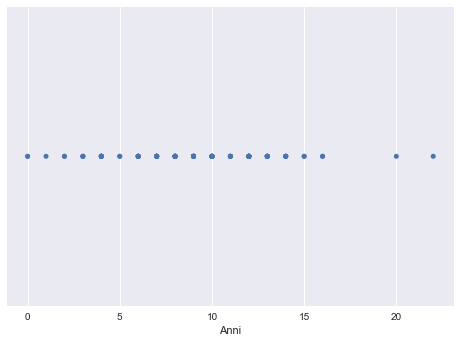

In [96]:
sns.stripplot(y='Anni',data=df_gc100, orient='h')
plt.show()

e vediamo che non è molto indicativo, anzi è a dir poco scarno:

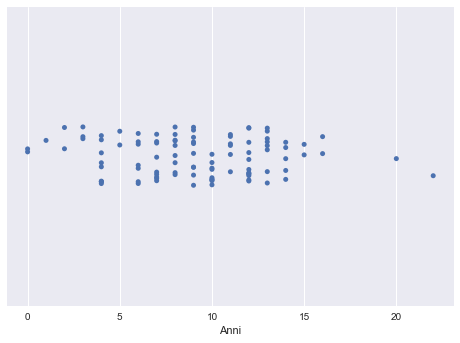

In [97]:
sns.stripplot(y='Anni',data=df_gc100, orient='h', jitter=True)
plt.show()